# Lab 7: Numerical Integration (#1)

Welcome to Lab 07! Throughout the course you will complete a lab assignments like this one. You can't learn technical subjects without hands-on practice, so labs are an important part of the course.

Collaborating on labs is more than okay -- it's encouraged. You should rarely remain stuck for more than a few minutes on questions in labs, so ask a neighbor or an instructor for help. Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it. You should **not** just copy/paste someone else's code, but rather work together to gain understanding of the task you need to complete. 

In today's lab, you'll learn:

- How to implement several familiar numerical integration techniques

- More about the error associated with each technique


To receive credit for a lab, answer all questions correctly and submit before the deadline.

**Due Date:** Monday, April 22, 2024 at 4:59 pm

**Collaboration Policy:** Labs are a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below**.

**Collaborators:** 

List collaborators here.

## 1. Integration Review

**Question #1** Evaluate each of the following definite integrals by finding the antiderivative and using the Fundamental Theorem of Calculus:
1. $\displaystyle \int_0^{\frac{\pi}{2}} \cos x \ dx$
2. $\displaystyle \int_0^{\frac{\pi}{2}} \sin^2 x \ \cos x \ dx$
3. $\displaystyle \int_0^1 x \cdot e^x \ dx$

Be sure to show "enough" work - at a minimum, show the antiderivative as well as the final result. (If you prefer to work on paper, you may take a picture of your work but please upload that picture to a google doc or other sharing service, and include a link here.)


https://docs.google.com/document/d/1Nn3nB5AZ6zWCEjlc2sDIFiZpgZ1Hfvd9XderN05-dFc/edit?usp=sharing

## 2. Python Review

It seems it's been a while since we've used Python much in this class, so a little review may be a good idea!

The `np.linspace()` function returns evenly spaced numbers over a specified interval. For example, 

`np.linspace(2, 3, 5)` 

would return 

`array([2., 2.25, 2.5 , 2.75, 3.])`. 

Since this is an array object we can iterate over each element. Remember, Python gives the index value 0 for the first element. For example, if we saved our array to `x`

`x = np.linspace(2, 3, 5)` 

then evaluated

`x[1]`

we would get 2.25. If instead we wanted the first element, then we would need to evaluate `x[0]`.

Try it for yourself.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

x = np.linspace(2, 3, 5)
x[1]

2.25

If we wanted to iterate over all the items we can run

```
for i in x:
    print(i)
    
2.0
2.25
2.5
2.75
3.0
```

or, to iterate over a subset of the items we can run

```
for i in x[1:3]:
    print(i)
    
2.25
2.5
```

notice that item 3 (i.e., the fourth item in the array 2.75) is not included.

Try it for yourself.

In [2]:
for i in x:
    print(i)

2.0
2.25
2.5
2.75
3.0


We can use an array to provide the inputs for a `lambda` function. Remember the syntax for a `lambda` function is 

```
f = lambda x: x**2
```

If we define `f` we input the values from our array into `f`


```
for i in x:
    print(f(i))

4.0
5.0625
6.25
7.5625
9.0
```

Try it and see.

In [3]:
f = lambda x: x**2

for i in x:
    print(f(i))

4.0
5.0625
6.25
7.5625
9.0


Throughout this notebook you can use `np.linspace` and `lambda` functions to help you complete the exercises. 

**Note:** There are other methods that can be used to accomplish the same task. Feel free to use other methods, if you have experience using Python and prefer other methods.

## 3. Graphing

Let's write a lambda function that we can use to graph each function over its interval of integration.

**Question 2.** Write a lambda function and sketch the graph of $f_1(x)=\cos x$ from $0$ to $\pi/2$.

**Hint:** Use cosine from numpy (i.e., `np.cos`)

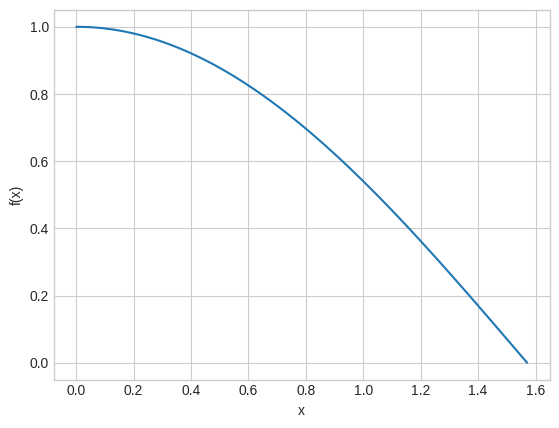

In [7]:
f = lambda x: np.cos(x)
a = 0
b = np.pi/2

x_values = np.linspace(a, b, 100)
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**Question 3.** Write a lambda function to sketch the graph of $f_2(x)=\sin^2 x \cos x$ from $0$ to $\pi/2$.

**Hint:** Use sine and cosine from numpy (i.e., `np.sin` and `np.cos`)

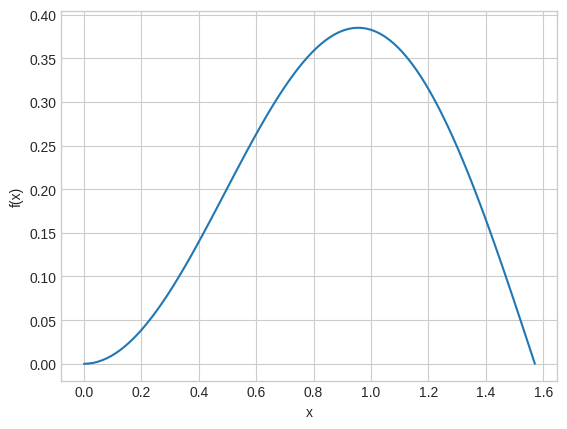

In [6]:
f = lambda x: np.sin(x) * np.cos(x) * np.sin(x)

a = 0
b = np.pi/2

x_values = np.linspace(a, b, 100)
y_values = f(x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**Question 4.**  Write a lambda function to sketch the graph of $f_3(x)=x \cdot e^x$ from 0 to 1.

**Hint:** Use $e$ from numpy (i.e., `np.exp`)

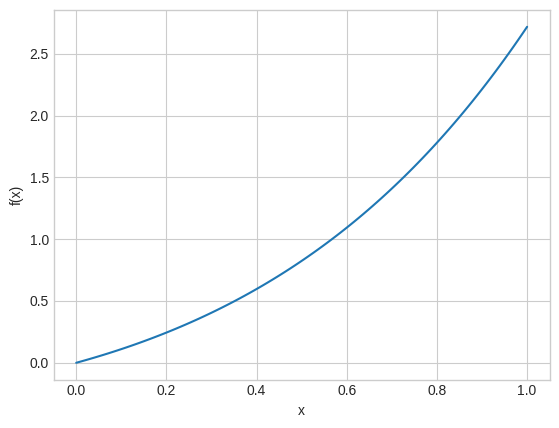

In [8]:
f = lambda x: np.exp(x) * x
a = 0
b = 1

x_values = np.linspace(a, b, 100)
y_values = f(x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## 4. Numerical Integration

Given below is a Python function to approximate a definite integral using the left-hand sum. Read it to see how it works, as you may use it as a template for later functions (if you wish to do so).

In [10]:
def left_sum(a, b, n, f):
    """
    Purpose
    -------
    Compute the left-hand sum
    
    Parameters
    ----------
    a: Start x-value
    b: End x-value
    n: Number of subintervals
    f: Lambda function for f
    
    Returns
    -------
    Numerical approximation of the definite integral
    """
    sum = 0
    deltax = (b-a)/n
    x = np.linspace(a, b, n+1)
    for i in x[0:n]:
        sum += f(i)*deltax
    return sum

f = lambda x : x*np.exp(x)
print(left_sum(0, 1, 20, f))

0.9329671700464394


**Question 5.** Write a function to approximate a definite integral using the right-hand sum. Use it to approximate each of the 3 integrals at the beginning of the lab; for each use 10 subintervals.

In [17]:
def righthand_sum(f, a, b, n):
    delta_x = (b - a) / n
    integral_sum = 0
    for i in range(1, n+1):
        x = a + i * delta_x
        integral_sum += f(x)
    return delta_x * integral_sum

f1 = lambda x: np.cos(x)
f2 = lambda x: np.sin(x) * np.cos(x) * np.sin(x)
f3 = lambda x: np.exp(x) * x
a1, b1 = 0, np.pi/2
a2, b2 = 0, np.pi/2
a3, b3 = 0, 1

#subinterval
n = 10

ap1 = righthand_sum(f1, a1, b1, n)
ap2 = righthand_sum(f2, a2, b2, n)
ap3 = righthand_sum(f3, a3, b3, n)
print(ap1)
print(ap2)
print(ap3)

0.9194031700146125
0.33127121632431
1.1396101346876886


**Question 6.** Write a function to approximate a definite integral using the trapezoid rule. Use it to approximate each of the 3 integrals at the beginning of the lab; for each use 10 subintervals.

In [26]:
def trapezoid_rule(f, a, b, n):
    delta_x = (b - a) / n
    integral_sum = 0
    for i in range(n):
        x0 = a + i * delta_x
        x1 = a + (i + 1) * delta_x
        integral_sum += (f(x0) + f(x1)) / 2
    return delta_x * integral_sum

a1, b1 = 0, np.pi/2
a2, b2 = 0, np.pi/2
a3, b3 = 0, 1
n = 10

ap1 = trapezoid_rule(f1, a1, b1, n)
ap2 = trapezoid_rule(f2, a2, b2, n)
ap3 = trapezoid_rule(f3, a3, b3, n)
print(ap1)
print(ap2)
print(ap3)


0.9979429863543572
0.33127121632431
1.0036960432647364


## 5. Error

Now that we have python functions it is easy to perform our calculations using more subintervals. Let's investigate what happens to the errors when we increase the number of subintervals. Use the code cells to find the error for the given definite integral, for each of the given number of subintervals. Ideally, you should make a table that contains the number of subintervals, the approximation, and the error. As an example, left-hand sums for $\displaystyle \int_0^{\frac{\pi}{2}} \cos x \ dx$ are shown below.

|**n**|**Approximation for n**|**Exact value - Approximation for n**|
|-----|-----------------------|---------------------------------------|
|2 |1.340758530667244 |-0.34075853066724404 |
|4 |1.1834653418221375|-0.18346534182213747 |
|8 |1.0949599423108507|-0.0949599423108507  |
|16|1.048284065697413 |-0.04828406569741306 |
|32|1.024342886926189 |-0.024342886926189022|

**Note:** Feel free to use a spreadsheet or a calculator, if you prefer. Just make sure you enter your results in the notebook (via link to a google doc is fine). If you write code to print the output, you do not need to make a markdown table.

**Question 7.** Approximate $\displaystyle \int_0^1 x \cdot e^x \ dx$, for $n=2,4,8,16,32$ using the left-hand sum.

In [27]:
f = lambda x: x * np.exp(x)
a = 0
b = 1
results = []
nsub = [2, 4, 8, 16, 32]

for n in nsub:
    result = left_sum(a, b, n, f)
    results.append(result)

# Print the results
for i in range(len(n_values)):
    print(f"n = {nsub[i]}: {results[i]}")

n = 2: 0.41218031767503205
n = 4: 0.6832792504953764
n = 8: 0.8358814930891292
n = 16: 0.9164977199283625
n = 32: 0.9578878844770272


You can use the blank markdown cell below to enter your table. If you need help making tables in markdown click [here](https://www.markdownguide.org/extended-syntax/) and scroll down to the section on **Tables**.

_or, use this markdown cell to make a table for #7_

**Question 8.** Approximate $\displaystyle \int_0^1 x \cdot e^x \ dx$, for $n=2,4,8,16,32$ using trapezoids.

In [31]:
n_values = [2, 4, 8, 16, 32]
results = []
for n in n_values:
    result = trapezoid_rule(f, a, b, n)
    results.append(result)
for i in range(len(n_values)):
    print(f"n = {n_values[i]}: {results[i]}")

n = 2: 1.0917507747897934
n = 4: 1.0230644790527572
n = 8: 1.0057741073678197
n = 16: 1.0014440270677076
n = 32: 1.0003610380466998


**Question 9.** Look at how the error decreases (with increasing $n$) for left-hand sums and for trapezoid. More specifically, by approximately what factor does the error decrease for each method (as $n$ is doubled)? Based on what you know about error formulas, is this what you expect? Why?

It appears that as the n value doubles (subintervals) the factor by which the error decreases is 1/4. This is expected beause it aligns with error formulas becuase the trapazoid

## 5. Submitting your work
You're done with Lab 07! Submit your work by doing the following:

* Save your notebook

* Restart the kernel and run all cells.

* Right-click the `lab07` file in the navigation pane, then click "download."

* Upload the file you just downloaded to the Lab 07 assignment to Gradescope for Grading.